In [1]:
# Import Library

import pickle
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
# Save the Files

with open('gc4/pca_final_model.pkl', 'rb') as file_1:
    pca_final=pickle.load(file_1)
    
with open('gc4/km_pca1_model.pkl', 'rb') as file_2:
    km_pca1=pickle.load(file_2)
    
with open('gc4/pca_2d_model.pkl', 'rb') as file_3:
    pca_2d=pickle.load(file_3)
    
with open('gc4/numerical_scaler.pkl', 'rb') as file_5:
    scaler=pickle.load(file_5)

with open('gc4/list_num_cols.txt', 'r') as file_4:
    num_cols=json.load(file_4)

with open('gc4/model_imputer.pkl', 'rb') as file_7:
    imputer=pickle.load(file_7)
    
with open('gc4/model_windsoriser.pkl', 'rb') as file_8:
    windsoriser=pickle.load(file_8)

In [26]:
# Data loading
df=pd.read_csv('gc4/data_inf.csv')
df.pop(df.columns.values[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           10 non-null     int64  
 1   BALANCE                           10 non-null     float64
 2   BALANCE_FREQUENCY                 10 non-null     float64
 3   PURCHASES                         10 non-null     float64
 4   ONEOFF_PURCHASES                  10 non-null     float64
 5   INSTALLMENTS_PURCHASES            10 non-null     float64
 6   CASH_ADVANCE                      10 non-null     float64
 7   PURCHASES_FREQUENCY               10 non-null     float64
 8   ONEOFF_PURCHASES_FREQUENCY        10 non-null     float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  10 non-null     float64
 10  CASH_ADVANCE_FREQUENCY            10 non-null     float64
 11  CASH_ADVANCE_TRX                  10 non-null     int64  
 12  PURCHASES_T

In [27]:
# Feature Engineering
# Drop column balance_frequency yang tidak mempengaruhi segmentasi client
df.drop('BALANCE_FREQUENCY', axis=1, inplace=True)

In [28]:
# Check missing value
df.isnull().mean()

CUST_ID                             0.0
BALANCE                             0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [29]:
# Handling Missing value
df=pd.DataFrame(imputer.transform(df), columns=df.columns.values)
print ("Percentage of missing value :")
df.isnull().mean()*100

Percentage of missing value :


CUST_ID                             0.0
BALANCE                             0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [30]:
# Handling Outliers
df_capped = windsoriser.transform(df)

In [31]:
# Feature Scaling
df_num = df_capped[num_cols]
df_num_scaled = scaler.transform(df_num)
df_num_scaled=pd.DataFrame(df_num_scaled, columns=num_cols)
df_num_scaled

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000,0.635628,0.320092,0.883965,0.000000,1.000000
1,0.336206,0.142985,0.277956,0.000000,0.406518,0.700000,1.000000,0.000000,0.880001,0.9,0.207792,0.125506,0.212694,0.346068,0.000000,0.666667
2,0.705749,0.146704,0.285185,0.000000,0.000000,0.083333,0.133333,0.000000,0.000000,0.0,0.025974,0.562753,0.234934,0.482151,0.000000,1.000000
3,0.003690,0.007430,0.000000,0.016860,0.000000,0.083333,0.000000,0.083333,0.000000,0.0,0.025974,0.109312,0.024696,0.073608,0.000000,1.000000
4,0.007525,0.103775,0.000000,0.235471,0.000000,0.416667,0.000000,0.416667,0.000000,0.0,0.207792,0.109312,0.099601,0.064192,0.763636,1.000000
5,0.457524,0.017395,0.033815,0.000000,0.000000,0.083333,0.133333,0.000000,0.000000,0.0,0.025974,0.190283,0.187922,0.463987,0.000000,1.000000
6,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,1.000000,1.364372,1.000000,1.000000,0.233333,1.000000
7,0.015187,0.000000,0.000000,0.000000,0.698920,0.000000,0.000000,0.000000,0.366668,0.2,0.000000,0.068826,0.479681,0.042646,0.509091,1.000000
8,0.004088,0.122992,0.000000,0.279074,0.000000,0.583333,0.000000,0.500000,0.000000,0.0,0.181818,0.417004,0.105590,0.107352,1.000000,1.000000
9,0.016537,0.188620,0.000000,0.427988,0.000000,1.000000,0.000000,0.916667,0.000000,0.0,0.311688,0.109312,0.107488,0.126941,0.509091,1.000000


In [32]:
# Menyimpan hasil pca ke dalam dataframe
df_pca=pd.DataFrame(pca_final.transform(df_num_scaled),columns=['PC1','PC2','PC3','PC4'])

In [33]:
# Concate the df_final
df_final_pca=pd.concat([df_pca], axis=1)

In [35]:
# menggabungkan kolom prediksi ke dalam dataframe
y_pred_pca1 = km_pca1.predict(df_num_scaled)
df_cluster_pca1=df_num_scaled.copy()
df_cluster_pca1['clusters']=y_pred_pca1

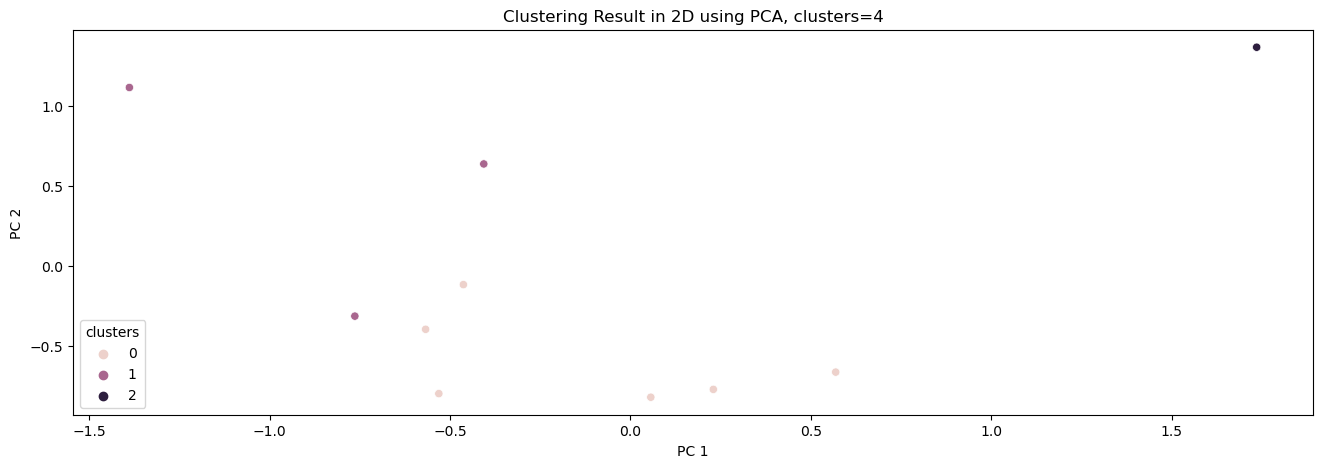

In [36]:
# dimension reduction into 2D using PCA
twod_pca=pca_2d.transform(df_num_scaled)

fig,ax=plt.subplots(figsize=(16,5))
sns.scatterplot(x=twod_pca[:,0],y=twod_pca[:,1], hue=df_cluster_pca1['clusters'])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('Clustering Result in 2D using PCA, clusters=4')

plt.show()

In [37]:
# Menggabungkan cluster ke dalam dataframe
df_cluster4=df_capped.copy()
df_cluster4['clusters']=y_pred_pca1

In [38]:
# Melihat hasil prediksi
df_cluster4

,CUST_ID,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,3454.0,4673.382925,0.000,0.00,0.000,2690.808707,0.000000,0.000000,0.000000,0.454545,10.0,0.0,8000.0,1241.538024,1439.230899,0.000000,12.0,1
1,8344.0,1571.218695,375.240,375.24,0.000,1093.862642,0.700000,0.625000,0.000000,0.400000,9.0,8.0,1700.0,824.975105,563.475533,0.000000,10.0,1
2,6614.0,3298.236901,385.000,385.00,0.000,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,7100.0,911.237387,785.033485,0.000000,12.0,0
3,3278.0,17.245539,19.500,0.00,19.500,0.000000,0.083333,0.000000,0.083333,0.000000,0.0,1.0,1500.0,95.789433,119.880198,0.000000,12.0,0
4,88.0,35.169250,272.340,0.00,272.340,0.000000,0.416667,0.000000,0.416667,0.000000,0.0,8.0,1500.0,386.322209,104.548700,0.272727,12.0,0
5,4274.0,2138.185971,45.650,45.65,0.000,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,2500.0,728.892219,755.461023,0.000000,12.0,0
6,6426.0,4673.382925,2624.325,1350.00,1156.575,0.000000,1.000000,0.625000,1.000000,0.000000,0.0,38.5,17000.0,3878.692432,1628.149019,0.083333,12.0,2
7,2920.0,70.976464,0.000,0.00,0.000,1880.659305,0.000000,0.000000,0.000000,0.166667,2.0,0.0,1000.0,1860.536797,69.470274,0.181818,12.0,1
8,644.0,19.104261,322.770,0.00,322.770,0.000000,0.583333,0.000000,0.500000,0.000000,0.0,7.0,5300.0,409.550536,174.819050,0.357143,12.0,0
9,956.0,77.285458,495.000,0.00,495.000,0.000000,1.000000,0.000000,0.916667,0.000000,0.0,12.0,1500.0,416.913773,206.712535,0.181818,12.0,0


Dari data inference baru yg didapat, diduga 10 clients yang datanya baru masuk terbagi ke dalam 4 cluster :
- 6 orang cluster 0 (clients yang tidak terlalu sering menggunakan cc)
- 3 orang cluster 1 (clients yang menggunakan cc di level frequency menengah)
- 1 orang cluster 2 (clients yang menggunakan cc untuk jumlah uang yang cukup besar)